In [5]:
import numpy as np
import anndata
import pandas as pd
import scanpy as sc
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy


from moscot.problems.time._lineage import TemporalProblem

In [6]:
Path="/home/mgander/moscot-framework_reproducibility/data/mouse_temporal"
ts=['E3.5', 'E4.5', 'E5.25', 'E5.5', 'E6.25', 'E6.5', 'E6.75', 'E7.0', 'E7.25', 'E7.5', 'E7.75', 'E8.0', 'E8.25', 'E8.5a', 'E8.5b', 'E9.5', 'E10.5', 'E11.5', 'E12.5', 'E13.5']

# Moscot maps to growth rates

In [7]:
cells=[32, 80, 100, 120, 400, 660, 1720, 4500, 8200, 15000, 30000, 60000, 73000, 90000, 90000, 200000, 1100000, 2600000, 6000000, 13000000]
Cell_number_dict={}
for i in range(20):
    Cell_number_dict[ts[i]]=cells[i]

In [8]:
# Doesn't matter which adata you use to create a tp instance, the result is always the same. I just need one
# to instantiate a tp-problem
adata=sc.read(f"{Path}/anndatas/Comb_anndatas/adata_E3.5_E4.5.h5ad")
tp=TemporalProblem(adata)

Only considering the two last: ['.5', '.h5ad'].
Only considering the two last: ['.5', '.h5ad'].


In [9]:
corm=[]
cort=[]
ns=[]
d=[]
ctd=[]
for i in range(13):
    ts0=ts[i]
    ts1=ts[i+1]
    print(f'{ts0} --> {ts1}')
    print('------------------------')

    tp=tp.load(f'{Path}/moscot_maps/{ts0}_{ts1}_no_gr2_TemporalProblem.pkl')
    adata=tp.adata
    time_tuple=list(tp.solutions.keys())[0]
    gr=tp[time_tuple].solution.a
    gr=gr/gr.mean()*Cell_number_dict[ts1]/Cell_number_dict[ts0]

    cell_dying=np.sum((1-gr[gr<1]))
    apoptosis_rate=float(cell_dying/len(gr))
    apoptosis_rate

    tp=TemporalProblem(adata)
    tp.score_genes_for_marginals(gene_set_proliferation='mouse',  gene_set_apoptosis='mouse')
    tp = tp.prepare('day', joint_attr=f'X_pcaS')

    A0=adata[adata.obs['day']==time_tuple[0]].copy()
    #A0.obs['gr']=z_transf(gr)
    #A0.obs['gr_init']=z_transf(list(tp.prior_growth_rates['prior_growth_rates'])[:len(A0)])

    #A0.obs['gr_t']=np.load(f'{Path}/TOME_transport_maps/{ts0}_growth_rates.npy')
    A0.obs['gr']=gr
    A0.obs['gr_init']=list(tp.prior_growth_rates['prior_growth_rates'])[:len(A0)]
    
    grT=np.load(f'{Path}/TOME_transport_maps/{ts0}_growth_rates2.npy')
    A0.obs['grT']=grT



    cts=list(set(A0.obs['cell_type']))

    for ct in cts:
        As=A0[A0.obs['cell_type']==ct]
        #sns.scatterplot(data=As.obs, x='gr', y='gr_init', s=5)
        #plt.xlim(0,4)
        #plt.pause(0.01)
        #if len(As)>400:
        ns.append(len(As))
        corm.append(scipy.stats.pearsonr(x=As.obs['gr'], y=As.obs['gr_init'])[0])
        cort.append(scipy.stats.pearsonr(x=As.obs['grT'], y=As.obs['gr_init'])[0])
        d.append(ts0)
        ctd.append(ct)
    #sns.histplot(cor, bins=np.linspace(-1,1,51))
    #plt.pause(0.001)
    #sns.scatterplot(x=ns, y=cor)
    #plt.pause(0.001)

E3.5 --> E4.5
------------------------
E4.5 --> E5.25
------------------------
E5.25 --> E5.5
------------------------
E5.5 --> E6.25
------------------------
E6.25 --> E6.5
------------------------
E6.5 --> E6.75
------------------------
E6.75 --> E7.0
------------------------
E7.0 --> E7.25
------------------------
E7.25 --> E7.5
------------------------
E7.5 --> E7.75
------------------------



KeyboardInterrupt



In [10]:
corm=[]
cort=[]
ns=[]
d=[]
ctd=[]
for i in range(13):
    ts0=ts[i]
    ts1=ts[i+1]
    print(f'{ts0} --> {ts1}')
    print('------------------------')

    tp=tp.load(f'{Path}/moscot_maps/{ts0}_{ts1}_no_gr2_TemporalProblem.pkl')
    adata=tp.adata
    time_tuple=list(tp.solutions.keys())[0]
    gr=tp[time_tuple].solution.a
    gr=gr/gr.mean()*Cell_number_dict[ts1]/Cell_number_dict[ts0]

    cell_dying=np.sum((1-gr[gr<1]))
    apoptosis_rate=float(cell_dying/len(gr))
    apoptosis_rate

    tp=TemporalProblem(adata)
    tp.score_genes_for_marginals(gene_set_proliferation='mouse',  gene_set_apoptosis='mouse')
    tp = tp.prepare('day', joint_attr=f'X_pcaS')

    A0=adata[adata.obs['day']==time_tuple[0]].copy()
    #A0.obs['gr']=z_transf(gr)
    #A0.obs['gr_init']=z_transf(list(tp.prior_growth_rates['prior_growth_rates'])[:len(A0)])

    #A0.obs['gr_t']=np.load(f'{Path}/TOME_transport_maps/{ts0}_growth_rates.npy')
    A0.obs['gr']=gr
    
    grT=np.load(f'{Path}/TOME_transport_maps/{ts0}_growth_rates2.npy')
    A0.obs['grT']=grT
    
    
    scanpy.pp.scale(A0)
    cc_genes_mouse=list(pd.read_csv(f'{Path}/utils/mouse_proliferation.txt', header=None)[0])
    scanpy.tl.score_genes(A0, cc_genes_mouse)

    #A0.obs['gr_init']=list(tp.prior_growth_rates['prior_growth_rates'])[:len(A0)]
    A0.obs['gr_init']=A0.obs['score']
    
    cts=list(set(A0.obs['cell_type']))

    for ct in cts:
        As=A0[A0.obs['cell_type']==ct]
        #sns.scatterplot(data=As.obs, x='gr', y='gr_init', s=5)
        #plt.xlim(0,4)
        #plt.pause(0.01)
        #if len(As)>400:
        ns.append(len(As))
        corm.append(scipy.stats.pearsonr(x=As.obs['gr'], y=As.obs['gr_init'])[0])
        cort.append(scipy.stats.pearsonr(x=As.obs['grT'], y=As.obs['gr_init'])[0])
        d.append(ts0)
        ctd.append(ct)
    #sns.histplot(cor, bins=np.linspace(-1,1,51))
    #plt.pause(0.001)
    #sns.scatterplot(x=ns, y=cor)
    #plt.pause(0.001)
df=pd.DataFrame({'n':ns, 'corm':corm, 'cort':cort, 'd':d, 'ct':ctd})

E3.5 --> E4.5
------------------------
E4.5 --> E5.25
------------------------
E5.25 --> E5.5
------------------------
E5.5 --> E6.25
------------------------
E6.25 --> E6.5
------------------------
E6.5 --> E6.75
------------------------
E6.75 --> E7.0
------------------------
E7.0 --> E7.25
------------------------
E7.25 --> E7.5
------------------------
E7.5 --> E7.75
------------------------
E7.75 --> E8.0
------------------------
E8.0 --> E8.25
------------------------
E8.25 --> E8.5a
------------------------


<Axes: xlabel='n', ylabel='corm'>

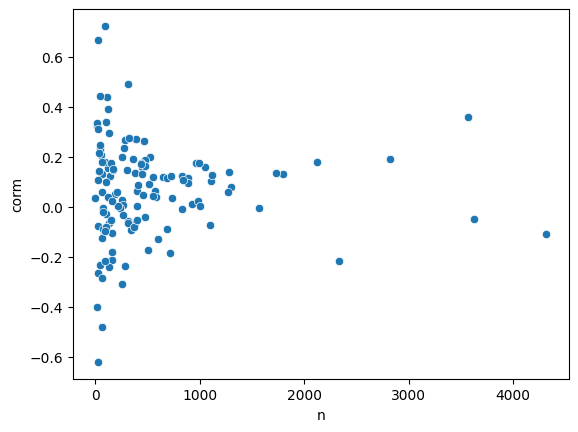

In [12]:
sns.scatterplot(data=df, x='n', y='corm')

In [13]:
k=101

corn=[]
for n in np.linspace(0,5000,k):
    dfn=df[df['n']>n]
    corn.append(dfn['corm'].mean())

<Axes: >

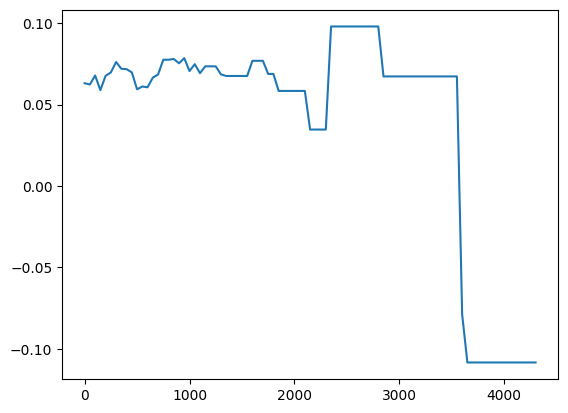

In [14]:
sns.lineplot(x=np.linspace(0,5000,k), y=corn)

In [18]:
dfn=df[df['n']>100]
dfn

,n,corm,cort,d,ct
3,120,0.390577,-0.335509,E5.25,Visceral endoderm
4,116,0.437306,-0.033464,E5.25,Epiblast
8,314,0.491657,0.298566,E5.5,Epiblast
13,143,0.121708,0.055668,E6.25,Epiblast
17,835,0.124061,0.320361,E6.5,Primitive streak and adjacent ectoderm
...,...,...,...,...,...
121,1275,0.059435,0.034674,E8.25,Paraxial mesoderm A
123,839,0.106684,0.065668,E8.25,Paraxial mesoderm B
124,554,0.040674,0.071012,E8.25,Amniochorionic mesoderm A
125,153,-0.054427,-0.100294,E8.25,Rostral neuroectoderm


In [19]:
dfn['corm'].mean()

0.06780871209075086

In [20]:
dfn['cort'].mean()

-0.001273472618100531

In [23]:
(dfn['corm']>0).sum()

67

In [24]:
len(dfn)

96

In [92]:
(dfn['cor']>0).sum()

50

<Axes: xlabel='corm', ylabel='Count'>

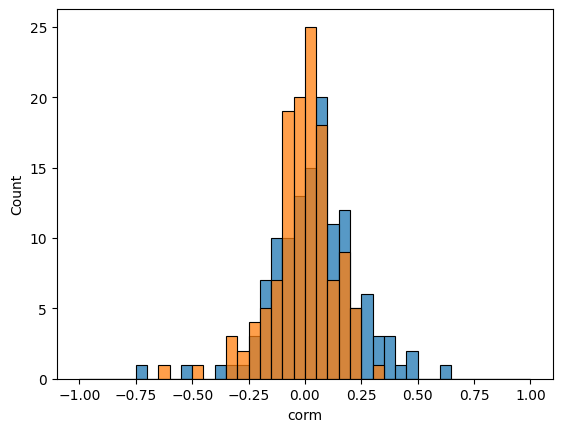

In [118]:
sns.histplot(data=df, x='corm', bins=np.linspace(-1,1,41))
sns.histplot(data=df, x='cort', bins=np.linspace(-1,1,41))

In [39]:
ns

[]

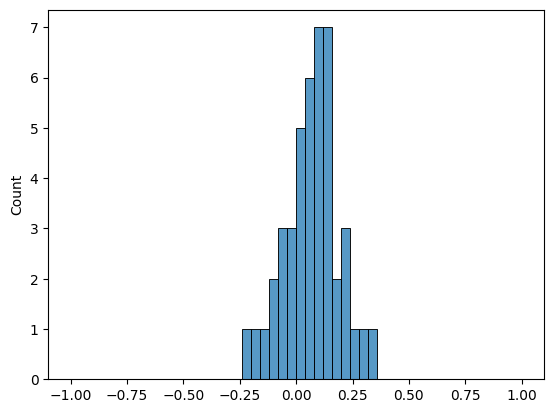

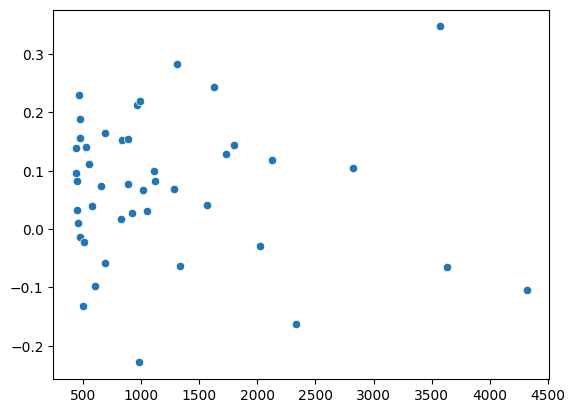

In [35]:
sns.histplot(cor, bins=np.linspace(-1,1,51))
plt.pause(0.001)
sns.scatterplot(x=ns, y=cor)
plt.pause(0.001)

In [31]:
np.mean(cor)

0.05322615634428257

In [303]:
As=A0[A0.obs['cell_type']=='Blood progenitors']

(0.0, 4.0)

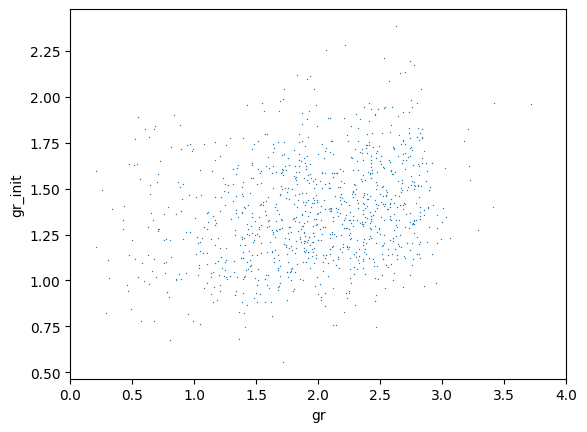

In [305]:
sns.scatterplot(data=As.obs, x='gr', y='gr_init', s=1)
plt.xlim(0,4)

In [243]:
adata

AnnData object with n_obs × n_vars = 24502 × 29452
    obs: 'cellID', 'day', 'cell_state', 'cell_type', 'group', 'sample', 'origin', 'proliferation', 'apoptosis'
    var: 'features', 'gene_names'
    obsm: 'X_pcaS', 'X_umap3'

In [260]:
scanpy.pp.scale(A0)

In [261]:
cc_genes_mouse=list(pd.read_csv(f'{Path}/utils/mouse_proliferation.txt', header=None)[0])
scanpy.tl.score_genes(A0, cc_genes_mouse)

(0.0, 4.0)

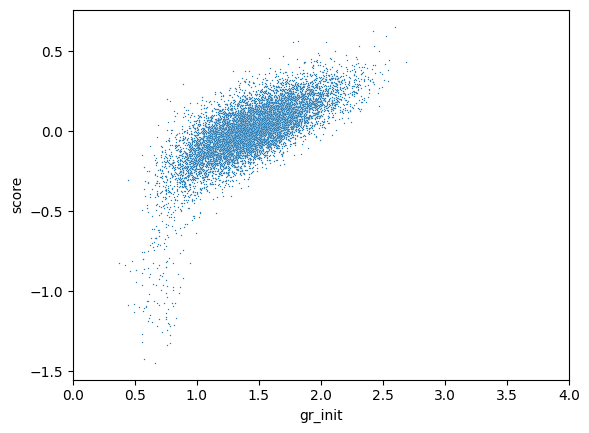

In [262]:
sns.scatterplot(data=A0.obs, x='gr_init', y='score', s=1)
plt.xlim(0,4)

(0.0, 4.0)

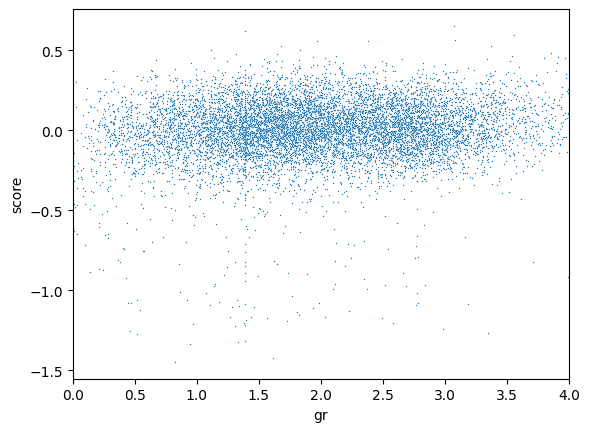

In [263]:
sns.scatterplot(data=A0.obs, x='gr', y='score', s=1)
plt.xlim(0,4)

In [264]:
scipy.stats.pearsonr(x=A0.obs['gr'], y=A0.obs['score'])

(0.11088526113803816, 8.131657700462687e-29)

In [6]:
corm=[]
cort=[]
ns=[]
d=[]
ctd=[]


i=11
ts0=ts[i]
ts1=ts[i+1]
print(f'{ts0} --> {ts1}')
print('------------------------')

tp=tp.load(f'{Path}/moscot_maps/{ts0}_{ts1}_no_gr2_TemporalProblem.pkl')
adata=tp.adata
time_tuple=list(tp.solutions.keys())[0]
gr=tp[time_tuple].solution.a
gr=gr/gr.mean()*Cell_number_dict[ts1]/Cell_number_dict[ts0]

cell_dying=np.sum((1-gr[gr<1]))
apoptosis_rate=float(cell_dying/len(gr))
apoptosis_rate

tp=TemporalProblem(adata)
tp.score_genes_for_marginals(gene_set_proliferation='mouse',  gene_set_apoptosis='mouse')
tp = tp.prepare('day', joint_attr=f'X_pcaS')

A0=adata[adata.obs['day']==time_tuple[0]].copy()
#A0.obs['gr']=z_transf(gr)
#A0.obs['gr_init']=z_transf(list(tp.prior_growth_rates['prior_growth_rates'])[:len(A0)])

#A0.obs['gr_t']=np.load(f'{Path}/TOME_transport_maps/{ts0}_growth_rates.npy')
A0.obs['gr']=gr
A0.obs['gr_init']=list(tp.prior_growth_rates['prior_growth_rates'])[:len(A0)]

grT=np.load(f'{Path}/TOME_transport_maps/{ts0}_growth_rates2.npy')
A0.obs['grT']=grT



cts=list(set(A0.obs['cell_type']))

for ct in cts:
    As=A0[A0.obs['cell_type']==ct]
    #sns.scatterplot(data=As.obs, x='gr', y='gr_init', s=5)
    #plt.xlim(0,4)
    #plt.pause(0.01)
    #if len(As)>400:
    ns.append(len(As))
    corm.append(scipy.stats.pearsonr(x=As.obs['gr'], y=As.obs['gr_init'])[0])
    cort.append(scipy.stats.pearsonr(x=As.obs['grT'], y=As.obs['gr_init'])[0])
    d.append(ts0)
    ctd.append(ct)
#sns.histplot(cor, bins=np.linspace(-1,1,51))
#plt.pause(0.001)
#sns.scatterplot(x=ns, y=cor)
#plt.pause(0.001)
df=pd.DataFrame({'n':ns, 'corm':corm, 'cort':cort, 'd':d, 'ct':ctd})

E8.0 --> E8.25
------------------------
